In [204]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import euclidean
from sklearn.cluster import SpectralClustering
from heapq import nlargest
import matplotlib.pyplot as plt

In [237]:
# Input the data
names = ['radius', 'texture', 'perimeter', 'area' ,'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry',  'fractal_dimension']
paras = ['mean', 'se', 'w']
first_two = ['ID', 'Diagnosis']
newnames = []
for para in paras:
    for name in names:
        newname = name + para
        newnames.append(newname)
newnames = first_two + newnames

In [238]:
df = pd.read_csv('../data/wdbc.data', names = newnames)
df_new = df.drop(columns=['ID'])
df_new['Diagnosis'] = df_new.Diagnosis.replace(to_replace=['M', 'B'], value=[1, 0])
df_new

,Diagnosis,radiusmean,texturemean,perimetermean,areamean,smoothnessmean,compactnessmean,concavitymean,concave_pointsmean,symmetrymean,...,radiusw,texturew,perimeterw,areaw,smoothnessw,compactnessw,concavityw,concave_pointsw,symmetryw,fractal_dimensionw
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [239]:
y = df_new['Diagnosis']
X = df_new.iloc[:, 1:]

In [ ]:
# Not include in assignment
####################################################################################################

In [206]:
X_train,X_test,y_train,y_test = train_test_split(X, y ,train_size=0.8, stratify=y)
scaler = MinMaxScaler()
X_fit = scaler.fit(X_train)
X_train_max = X_fit.transform(X_train)
X_test_max = X_fit.transform(X_test)
X_train_new = pd.DataFrame(X_train_max, columns = X_train.columns)
X_test_new = pd.DataFrame(X_test_max, columns = X_train.columns)

In [214]:
# Split data for semi_supervised data
train_data = pd.concat([y_train.reset_index(), X_train_new], axis=1, join="inner")
train_data = train_data.drop(['index'], axis=1)
train_data1 = train_data[train_data.Diagnosis == 1].sample(frac =.50)
train_data2 = train_data[train_data.Diagnosis == 0].sample(frac =.50)
semi_train_data = pd.concat([train_data1, train_data2])
X_train_semi = semi_train_data.iloc[:, 1:]
y_train_semi = semi_train_data['Diagnosis']
X_train_unlabel = X_train_new.loc[~X_train_new.index.isin(X_train_semi.index)]

In [175]:
tuned_parameters = [{'C': np.logspace(0, 5, num = 10)}]
svm = LinearSVC(penalty = 'l1', dual = False)
grid = GridSearchCV(svm, tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train_new, y_train)
grid.best_params_

{'C': 1.0}

In [176]:
# Train the labeled classifier
svc_linear = LinearSVC(penalty = 'l1',C = 1, dual = False)
svc_linear.fit(X_train_new, y_train)

# test stat
y_pred_linear = svc_linear.predict(X_test_new)
socre_linear = accuracy_score(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear, average='binary')
recal_linear = recall_score(y_test, y_pred_linear, average='binary')
f1_linear = f1_score(y_test, y_pred_linear, average='binary')
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_linear)
auc_linear = metrics.auc(fpr, tpr)

# train stat
y_pred_linear_train = svc_linear.predict(X_train_new)
socre_linear_train = accuracy_score(y_train, y_pred_linear_train)
precision_linear_train = precision_score(y_train, y_pred_linear_train, average='binary')
recal_linear_train = recall_score(y_train, y_pred_linear_train, average='binary')
f1_linear_train = f1_score(y_train, y_pred_linear_train, average='binary')
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_pred_linear_train)
auc_linear_train = metrics.auc(fpr_train, tpr_train)


In [ ]:
####################################################################################################

In [228]:
# Supervised learning
supervised_df_train = pd.DataFrame(columns = ['score', 'precision', 'recal', 'f1', 'AUC'])
supervised_df_test = pd.DataFrame(columns = ['score', 'precision', 'recal', 'f1', 'AUC'])
for m in range(1,31):
    # Split the data
    X_train,X_test,y_train,y_test = train_test_split(X, y ,train_size=0.8, stratify=y)
    scaler = MinMaxScaler()
    X_fit = scaler.fit(X_train)
    X_train_max = X_fit.transform(X_train)
    X_test_max = X_fit.transform(X_test)
    X_train_new = pd.DataFrame(X_train_max, columns = X_train.columns)
    X_test_new = pd.DataFrame(X_test_max, columns = X_train.columns)
    
    # Cross validate the C
    tuned_parameters = [{'C': np.logspace(0, 5, num = 10)}]
    svm = LinearSVC(penalty = 'l1', dual = False)
    grid = GridSearchCV(svm, tuned_parameters, cv=5, scoring='accuracy')
    grid.fit(X_train_new, y_train)
    best_C = grid.best_params_['C']
    
    # Train the labeled classifier
    svc_linear = LinearSVC(penalty = 'l1',C = best_C, dual = False)
    svc_linear.fit(X_train_new, y_train)

    # test stat
    y_pred_linear = svc_linear.predict(X_test_new)
    socre_linear = accuracy_score(y_test, y_pred_linear)
    precision_linear = precision_score(y_test, y_pred_linear, average='binary')
    recal_linear = recall_score(y_test, y_pred_linear, average='binary')
    f1_linear = f1_score(y_test, y_pred_linear, average='binary')
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_linear)
    auc_linear = metrics.auc(fpr, tpr)

    # train stat
    y_pred_linear_train = svc_linear.predict(X_train_new)
    socre_linear_train = accuracy_score(y_train, y_pred_linear_train)
    precision_linear_train = precision_score(y_train, y_pred_linear_train, average='binary')
    recal_linear_train = recall_score(y_train, y_pred_linear_train, average='binary')
    f1_linear_train = f1_score(y_train, y_pred_linear_train, average='binary')
    fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_pred_linear_train)
    auc_linear_train = metrics.auc(fpr_train, tpr_train)
    
    length = len(supervised_df_train)
    supervised_df_train.loc[length] = [socre_linear_train, precision_linear_train, recal_linear_train, f1_linear_train, auc_linear_train]
    supervised_df_test.loc[length] = [socre_linear, precision_linear, recal_linear, f1_linear, auc_linear]

In [229]:
supervised_df_train.mean()

score        0.991250
precision    0.982931
recal        0.997833
f1           0.990323
AUC          0.991864
dtype: float64

In [230]:
supervised_df_test.mean()

score        0.989444
precision    0.979227
recal        0.997942
f1           0.988432
AUC          0.990217
dtype: float64

In [231]:
# test confusion matirx
confusion_matrix(y_test, y_pred_linear)

array([[98,  1],
       [ 0, 81]])

In [232]:
# train confusion matrix
confusion_matrix(y_train, y_pred_linear_train)

array([[391,   6],
       [  1, 322]])

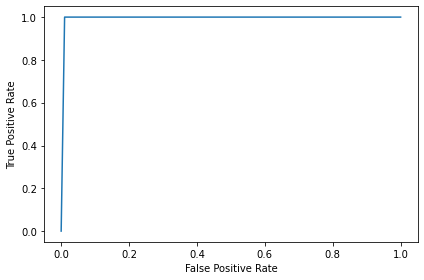

In [233]:
# ROC for test
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

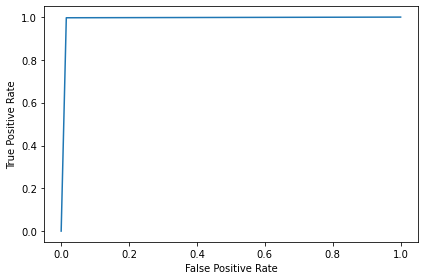

In [234]:
# ROC for train
plt.plot(fpr_train, tpr_train)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [177]:
# Fit the semi labeled classifier
tuned_parameters = [{'C': np.logspace(0, 5, num = 10)}]
svm = LinearSVC(penalty = 'l1', dual = False)
grid = GridSearchCV(svm, tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train_semi, y_train_semi)
grid.best_params_

{'C': 3.5938136638046276}

In [135]:
# Train the semi_labeled classifier
svc_linear_semi = LinearSVC(penalty = 'l1',C = 3.5938136638046276, dual = False)
svc_linear_semi.fit(X_train_semi, y_train_semi)


LinearSVC(C=3.5938136638046276, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
          max_iter=1000, multi_class='ovr', penalty='l1', random_state=None,
          tol=0.0001, verbose=0)

In [167]:
# Get the farthest unlabeled point
X_train_unlabel_new = X_train_unlabel.reset_index()
X_train_unlabel_final = X_train_unlabel_new.drop(['index'], axis = 1)
distance = abs(svc_linear_semi.decision_function(X_train_unlabel_final)).tolist()
farthest_index = distance.index(max(distance))
farthest = X_train_unlabel_final.iloc[[farthest_index]]
X_train_semi_new = X_train_semi.append(farthest, ignore_index = True)
y_train_semi_new = y_train_semi.append(pd.Series(svc_linear_semi.predict(farthest)), ignore_index = True)
X_train_unlabel_changed = X_train_unlabel_final.drop(farthest_index)


In [215]:
X_train_unlabel = X_train_unlabel.reset_index()
X_train_unlabel = X_train_unlabel.drop(['index'], axis = 1)
length = len(X_train_unlabel)
while X_train_unlabel.empty != True:
    
    # Cross Validate the C
    tuned_parameters = [{'C': np.logspace(0, 5, num = 10)}]
    svm = LinearSVC(penalty = 'l1', dual = False)
    grid = GridSearchCV(svm, tuned_parameters, cv=5, scoring='accuracy')
    grid.fit(X_train_semi, y_train_semi)
    
    # Fit the data using best C
    svc_linear_semi = LinearSVC(penalty = 'l1',C = grid.best_params_['C'], dual = False)
    svc_linear_semi.fit(X_train_semi, y_train_semi)
    
    # Get the farthest unlabeled point
    distance = abs(svc_linear_semi.decision_function(X_train_unlabel)).tolist()
    farthest_index = distance.index(max(distance))
    farthest = X_train_unlabel.iloc[[farthest_index]]
    X_train_semi = X_train_semi.append(farthest, ignore_index = True)
    y_train_semi = y_train_semi.append(pd.Series(svc_linear_semi.predict(farthest)), ignore_index = True)
    X_train_unlabel = X_train_unlabel.drop(farthest_index)
    X_train_unlabel = X_train_unlabel.reset_index()
    X_train_unlabel = X_train_unlabel.drop(['index'], axis = 1)
    

In [216]:
# test stat for semi
y_pred_semi = svc_linear_semi.predict(X_test_new)
socre_semi = accuracy_score(y_test, y_pred_semi)
precision_semi = precision_score(y_test, y_pred_semi, average='binary')
recal_semi = recall_score(y_test, y_pred_semi, average='binary')
f1_semi = f1_score(y_test, y_pred_semi, average='binary')
fpr_semi, tpr_semi, thresholds = metrics.roc_curve(y_test, y_pred_semi)
auc_semi = metrics.auc(fpr_semi, tpr_semi)

# train stat for semi
y_pred_semi_train = svc_linear.predict(X_train_semi)
socre_semi_train = accuracy_score(y_train, y_pred_semi_train)
precision_semi_train = precision_score(y_train, y_pred_semi_train, average='binary')
recal_semi_train = recall_score(y_train, y_pred_semi_train, average='binary')
f1_semi_train = f1_score(y_train, y_pred_semi_train, average='binary')
fpr_semi_train, tpr_semi_train, thresholds_train = metrics.roc_curve(y_train, y_pred_semi_train)
auc_semi_train = metrics.auc(fpr_semi_train, tpr_semi_train)

In [242]:
# Semi-supervised learning
semi_supervised_df_train = pd.DataFrame(columns = ['score', 'precision', 'recal', 'f1', 'AUC'])
semi_supervised_df_test = pd.DataFrame(columns = ['score', 'precision', 'recal', 'f1', 'AUC'])
for m in range (1,31):
    # Split the data
    X_train,X_test,y_train,y_test = train_test_split(X, y ,train_size=0.8, stratify=y)
    scaler = MinMaxScaler()
    X_fit = scaler.fit(X_train)
    X_train_max = X_fit.transform(X_train)
    X_test_max = X_fit.transform(X_test)
    X_train_new = pd.DataFrame(X_train_max, columns = X_train.columns)
    X_test_new = pd.DataFrame(X_test_max, columns = X_train.columns)
    
    # Split data for semi_supervised data
    train_data = pd.concat([y_train.reset_index(), X_train_new], axis=1, join="inner")
    train_data = train_data.drop(['index'], axis=1)
    train_data1 = train_data[train_data.Diagnosis == 1].sample(frac =.50)
    train_data2 = train_data[train_data.Diagnosis == 0].sample(frac =.50)
    semi_train_data = pd.concat([train_data1, train_data2])
    X_train_semi = semi_train_data.iloc[:, 1:]
    y_train_semi = semi_train_data['Diagnosis']
    X_train_unlabel = X_train_new.loc[~X_train_new.index.isin(X_train_semi.index)]
    X_train_unlabel = X_train_unlabel.reset_index()
    X_train_unlabel = X_train_unlabel.drop(['index'], axis = 1)
    length = len(X_train_unlabel)
    
    while X_train_unlabel.empty != True:
    
        # Cross Validate the C
        tuned_parameters = [{'C': np.logspace(0, 5, num = 10)}]
        svm = LinearSVC(penalty = 'l1', dual = False)
        grid = GridSearchCV(svm, tuned_parameters, cv=5, scoring='accuracy')
        grid.fit(X_train_semi, y_train_semi)
    
        # Fit the data using best C
        svc_linear_semi = LinearSVC(penalty = 'l1',C = grid.best_params_['C'], dual = False)
        svc_linear_semi.fit(X_train_semi, y_train_semi)
    
        # Get the farthest unlabeled point
        distance = abs(svc_linear_semi.decision_function(X_train_unlabel)).tolist()
        farthest_index = distance.index(max(distance))
        farthest = X_train_unlabel.iloc[[farthest_index]]
        X_train_semi = X_train_semi.append(farthest, ignore_index = True)
        y_train_semi = y_train_semi.append(pd.Series(svc_linear_semi.predict(farthest)), ignore_index = True)
        X_train_unlabel = X_train_unlabel.drop(farthest_index)
        X_train_unlabel = X_train_unlabel.reset_index()
        X_train_unlabel = X_train_unlabel.drop(['index'], axis = 1)
        
    # test stat for semi
    y_pred_semi = svc_linear_semi.predict(X_test_new)
    socre_semi = accuracy_score(y_test, y_pred_semi)
    precision_semi = precision_score(y_test, y_pred_semi, average='binary')
    recal_semi = recall_score(y_test, y_pred_semi, average='binary')
    f1_semi = f1_score(y_test, y_pred_semi, average='binary')
    fpr_semi, tpr_semi, thresholds = metrics.roc_curve(y_test, y_pred_semi)
    auc_semi = metrics.auc(fpr_semi, tpr_semi)

    # train stat for semi
    y_pred_semi_train = svc_linear_semi.predict(X_train_semi)
    socre_semi_train = accuracy_score(y_train, y_pred_semi_train)
    precision_semi_train = precision_score(y_train, y_pred_semi_train, average='binary')
    recal_semi_train = recall_score(y_train, y_pred_semi_train, average='binary')
    f1_semi_train = f1_score(y_train, y_pred_semi_train, average='binary')
    fpr_semi_train, tpr_semi_train, thresholds_train = metrics.roc_curve(y_train, y_pred_semi_train)
    auc_semi_train = metrics.auc(fpr_semi_train, tpr_semi_train)
    
    length = len(semi_supervised_df_train)
    semi_supervised_df_train.loc[length] = [socre_semi, precision_semi, recal_semi, f1_semi, auc_semi]
    semi_supervised_df_test.loc[length] = [socre_semi_train, precision_semi_train, recal_semi_train, f1_semi_train, auc_semi_train]

In [243]:
semi_supervised_df_train.mean()

score        0.961696
precision    0.966087
recal        0.930159
f1           0.947073
AUC          0.955126
dtype: float64

In [244]:
semi_supervised_df_test.mean()

score        0.538608
precision    0.379042
recal        0.368235
f1           0.373503
AUC          0.504235
dtype: float64

In [245]:
# Train Confusion Matrix
confusion_matrix(y_train, y_pred_semi_train)

array([[186,  99],
       [108,  62]])

In [246]:
# Test Confusion Matrix
confusion_matrix(y_test, y_pred_semi)

array([[71,  1],
       [ 4, 38]])

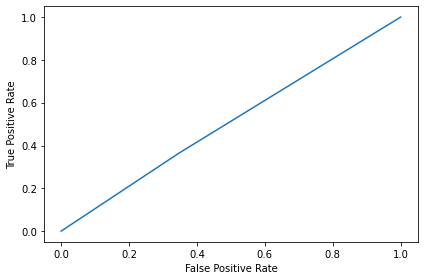

In [247]:
# ROC for train
plt.plot(fpr_semi_train, tpr_semi_train)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

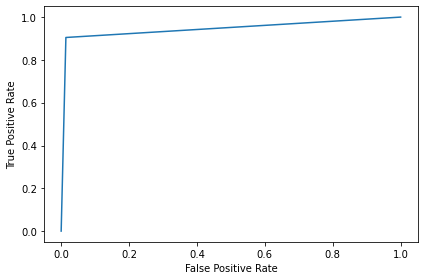

In [248]:
# ROC for test
plt.plot( fpr_semi, tpr_semi)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
# Unsupervised Learning
unsupervised_df_train = pd.DataFrame(columns = ['score', 'precision', 'recal', 'f1', 'AUC'])
unsupervised_df_test = pd.DataFrame(columns = ['score', 'precision', 'recal', 'f1', 'AUC'])
for m in range(1,31):
    # Spliting the data
    X_train,X_test,y_train,y_test = train_test_split(X, y ,train_size=0.8, stratify=y)
    X_train_km = X_train.reset_index()
    X_train_km = X_train_km.drop(['index'], axis = 1)
    y_train_km = y_train.reset_index().drop(['index'], axis = 1)
    y_test_km = y_test.reset_index().drop(['index'], axis = 1)
    
    # Run the model
    kmeans = KMeans(n_clusters = 2, init = 'random', n_init = 100).fit(X_train_km)
    km_labels = kmeans.predict(X_train_km).tolist()
    km_labels_test = kmeans.predict(X_test).tolist()
    
    # predict the result
    d = kmeans.transform(X_train_km)[:, 0]
    ind = np.argsort(d)[::][:30]
    x = ind.tolist()
    close_y = y_train_km.loc[x, :]
    label = close_y['Diagnosis'].mode()[0]
    
    d1 = kmeans.transform(X_train_km)[:, 1]
    ind1 = np.argsort(d1)[::][:30]
    x1 = ind1.tolist()
    close_y1 = y_train_km.loc[x1, :]
    label1 = close_y1['Diagnosis'].mode()[0]
    
    for i in range(len(km_labels)):
        if(km_labels[i] == 0):
            km_labels[i] = label
        else:
            km_labels[i] = label1
    
    for i in range(len(km_labels_test)):
        if(km_labels_test[i] == 0):
            km_labels_test[i] = label
        else:
            km_labels_test[i] = label1 
    
    # Train Stat
    score_un = accuracy_score(y_train_km['Diagnosis'].tolist(), km_labels)
    precision_un = precision_score(y_train_km['Diagnosis'].tolist(), km_labels, average='binary')
    recal_un = recall_score(y_train_km['Diagnosis'].tolist(), km_labels, average='binary')
    f1_un = f1_score(y_train_km['Diagnosis'].tolist(), km_labels, average='binary')
    fpr_un, tpr_un, thresholds = metrics.roc_curve(y_train_km['Diagnosis'].tolist(), km_labels)
    auc_un = metrics.auc(fpr_un, tpr_un)
    length = len(unsupervised_df_train)
    #print(score_un, precision_un, recal_un, f1_un, auc_un)
    unsupervised_df_train.loc[length] = [score_un, precision_un, recal_un, f1_un, auc_un]
    
    # Test Stat
    score_un_test = accuracy_score(y_test_km['Diagnosis'].tolist(), km_labels_test)
    precision_un_test = precision_score(y_test_km['Diagnosis'].tolist(), km_labels_test, average='binary')
    recal_un_test = recall_score(y_test_km['Diagnosis'].tolist(), km_labels_test, average='binary')
    f1_un_test = f1_score(y_test_km['Diagnosis'].tolist(), km_labels_test, average='binary')
    fpr_un_test, tpr_un_test, thresholds_test = metrics.roc_curve(y_test_km['Diagnosis'].tolist(), km_labels_test)
    auc_un_test = metrics.auc(fpr_un_test, tpr_un_test)
    length = len(unsupervised_df_test)
    unsupervised_df_test.loc[length] = [score_un_test, precision_un_test, recal_un_test, f1_un_test, auc_un_test]


In [43]:
unsupervised_df_train.mean()

score        0.851209
precision    0.993528
recal        0.605686
f1           0.752381
AUC          0.801674
dtype: float64

In [60]:
unsupervised_df_test.mean()

score        0.852924
precision    0.986808
recal        0.608730
f1           0.750992
AUC          0.802050
dtype: float64

In [218]:
# Train Confusion Matrix
confusion_matrix(y_train_km['Diagnosis'].tolist(), km_labels)

array([[217,  68],
       [136,  34]])

In [219]:
# Test Confusion Matrix
confusion_matrix(y_test_km['Diagnosis'].tolist(), km_labels_test)

array([[56, 16],
       [29, 13]])

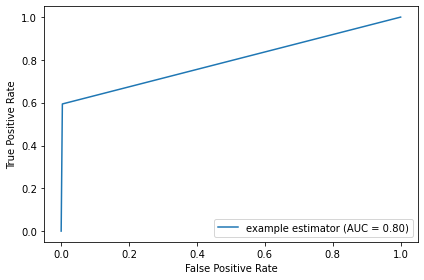

In [225]:
# ROC for train
roc_auc = metrics.auc(fpr_un, tpr_un)
display = metrics.RocCurveDisplay(fpr=fpr_un, tpr=tpr_un, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()

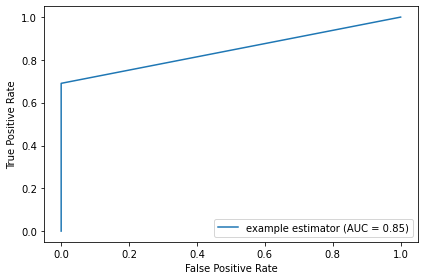

In [226]:
# ROC for test
roc_auc = metrics.auc(fpr_un_test, tpr_un_test)
display = metrics.RocCurveDisplay(fpr=fpr_un_test, tpr=tpr_un_test, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()

In [70]:
# Spectral Clustering
spectral_df_train = pd.DataFrame(columns = ['score', 'precision', 'recal', 'f1', 'AUC'])
spectral_df_test = pd.DataFrame(columns = ['score', 'precision', 'recal', 'f1', 'AUC'])
for m in range(1,31):
    # Spliting the data
    X_train,X_test,y_train,y_test = train_test_split(X, y ,train_size=0.8, stratify=y)
    scaler = MinMaxScaler()
    X_fit = scaler.fit(X_train)
    X_train_max = X_fit.transform(X_train)
    X_test_max = X_fit.transform(X_test)
    X_train_new = pd.DataFrame(X_train_max, columns = X_train.columns)
    X_test_new = pd.DataFrame(X_test_max, columns = X_train.columns)
    
    X_train_km = X_train_new.reset_index()
    X_train_km = X_train_km.drop(['index'], axis = 1)
    y_train_km = y_train.reset_index().drop(['index'], axis = 1)
    y_test_km = y_test.reset_index().drop(['index'], axis = 1)
    
    # Run the model
    clustering = SpectralClustering(n_clusters = 2, gamma = 1.0, affinity = 'rbf', random_state = m * 5).fit(X_train_km)
    clustering_labels = clustering.labels_.tolist()
    clustering_labels_test = clustering.fit_predict(X_test_new)
    index_0 = []
    index_1 = []
    for i in range(0, len(clustering_labels)):
        if clustering_labels[i] == 0:
            index_0.append(i)
        else:
            index_1.append(i)
    y0 = y_train_km.loc[index_0, :]
    y1 = y_train_km.loc[index_1, :]
    label0 = y0['Diagnosis'].mode()[0]
    label1 = y1['Diagnosis'].mode()[0]
    
    for i in range(len(clustering_labels)):
        if(clustering_labels[i] == 0):
            clustering_labels[i] = label0
        else:
            clustering_labels[i] = label1
    
    for i in range(len(clustering_labels_test)):
        if(clustering_labels_test[i] == 0):
            clustering_labels_test[i] = label0
        else:
            clustering_labels_test[i] = label1
    
    # Train Stat
    score_spe = accuracy_score(y_train_km['Diagnosis'].tolist(), clustering_labels)
    precision_spe = precision_score(y_train_km['Diagnosis'].tolist(), clustering_labels, average='binary')
    recal_spe = recall_score(y_train_km['Diagnosis'].tolist(), clustering_labels, average='binary')
    f1_spe = f1_score(y_train_km['Diagnosis'].tolist(), clustering_labels, average='binary')
    fpr_spe, tpr_spe, thresholds = metrics.roc_curve(y_train_km['Diagnosis'].tolist(), clustering_labels)
    auc_spe = metrics.auc(fpr_spe, tpr_spe)
    length = len(spectral_df_train)
    spectral_df_train.loc[length] = [score_spe, precision_spe, recal_spe, f1_spe, auc_spe]
    
    # Test Stat
    score_spe_test = accuracy_score(y_test_km['Diagnosis'].tolist(), clustering_labels_test)
    precision_spe_test = precision_score(y_test_km['Diagnosis'].tolist(), clustering_labels_test, average='binary')
    recal_spe_test = recall_score(y_test_km['Diagnosis'].tolist(), clustering_labels_test, average='binary')
    f1_spe_test = f1_score(y_test_km['Diagnosis'].tolist(), clustering_labels_test, average='binary')
    fpr_spe_test, tpr_spe_test, thresholds = metrics.roc_curve(y_test_km['Diagnosis'].tolist(),clustering_labels_test)
    auc_spe_test = metrics.auc(fpr_spe_test, tpr_spe_test)
    length = len(spectral_df_test)
    spectral_df_test.loc[length] = [score_spe_test, precision_spe_test, recal_spe_test, f1_spe_test, auc_spe_test]
    

In [73]:
spectral_df_train.mean()

score        0.858315
precision    0.983210
recal        0.631765
f1           0.768426
AUC          0.812607
dtype: float64

In [74]:
spectral_df_test.mean()

score        0.646199
precision    0.773558
recal        0.500794
f1           0.547262
AUC          0.615906
dtype: float64

In [214]:
# Train Confusion Matrix
confusion_matrix(y_train_km['Diagnosis'].tolist(), clustering_labels)

array([[282,   3],
       [ 59, 111]])

In [215]:
# Train Confusion Matrix
confusion_matrix(y_test_km['Diagnosis'].tolist(), clustering_labels_test)

array([[72,  0],
       [22, 20]])

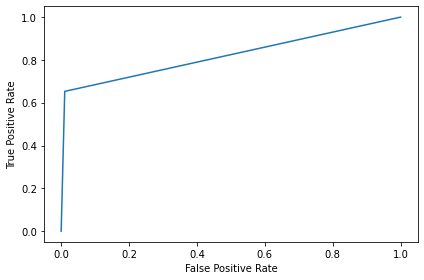

In [216]:
# ROC for train
plt.plot(fpr_spe, tpr_spe)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

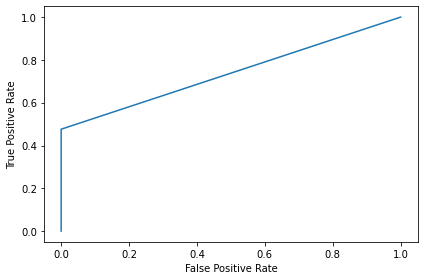

In [217]:
# ROC for test
plt.plot(fpr_spe_test, tpr_spe_test)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [86]:
bank_names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df_bank = pd.read_csv('../data/data_banknote_authentication.txt', names = bank_names)
y_bank = df_bank['class']
X_bank = df_bank.iloc[:, :-1]
train_bank, test_bank = train_test_split(df_bank ,test_size=472)

In [196]:
# Monte-Carlo simulation
passive_scores = []
active_scores = []
for m in range(1,51):
    
    # Passive Learning
    train_bank_c = train_bank.copy()
    train_d = pd.DataFrame(columns = bank_names)
    test_scores = []
    while train_bank_c.empty != True:

        train_select = train_bank_c.sample(n = 10, replace = False)
        train_d = pd.concat([train_select, train_d])
        idxs = train_select.index.tolist()
        train_bank_c = train_bank_c.drop(idxs)
        X = train_d.iloc[:, :-1]
        y = train_d['class']
        y = y.astype('int')

        tuned_parameters = [{'C': np.logspace(-3, 6, num = 10)}]
        svm = LinearSVC(penalty = 'l1', dual = False)
        grid = GridSearchCV(svm, tuned_parameters, cv=5, scoring='accuracy')
        grid.fit(X, y)
        best_c = grid.best_params_['C']


        svc_linear = LinearSVC(penalty = 'l1',C = best_c, dual = False)
        svc_linear.fit(X, y)
        pred_y = svc_linear.predict(test_bank.iloc[:, :-1])
        test_y = test_bank['class'].to_numpy()
        test_score = accuracy_score(test_y, pred_y)
        test_scores.append(test_score)
    passive_scores.append(test_scores)
    
    # Active Learning
    train_bank_d = train_bank.copy()
    train_bank_d = train_bank_d.reset_index().drop(['index'], axis = 1)
    train_e = pd.DataFrame(columns = bank_names)
    train_Select = train_bank_d.sample(n = 10, replace = False)
    idxs_e = train_Select.index.tolist()

    test_scores_active = []
    for i in range(1,91):
    
        train_e = pd.concat([train_Select, train_e])
        train_bank_d = train_bank_d.drop(idxs_e)
        train_bank_d = train_bank_d.reset_index().drop(['index'], axis = 1)
        X_active = train_e.iloc[:, :-1]
        y_active = train_e['class']
        y_active = y_active.astype('int')

        tuned_parameters = [{'C': np.logspace(-3, 6, num = 10)}]
        svm = LinearSVC(penalty = 'l1', dual = False)
        grid = GridSearchCV(svm, tuned_parameters, cv=5, scoring='accuracy')
        grid.fit(X_active, y_active)
        best_c = grid.best_params_['C']

        svc_linear = LinearSVC(penalty = 'l1',C = best_c, dual = False)
        svc_linear.fit(X_active, y_active)
        distance = abs(svc_linear.decision_function(train_bank_d.iloc[:, :-1])).tolist()
        nlargests = nlargest(10, distance)
        idxs_e = []
        for i in nlargests:
            idxs_e.append(distance.index(i))
        train_Select = train_bank_d.loc[idxs_e, :]
    
        svc_linear = LinearSVC(penalty = 'l1',C = best_c, dual = False)
        svc_linear.fit(X_active, y_active)
        pred_y = svc_linear.predict(test_bank.iloc[:, :-1])
        test_y = test_bank['class'].to_numpy()
        test_score = accuracy_score(test_y, pred_y)
        test_scores_active.append(test_score)
    active_scores.append(test_scores_active)
    
# Final Calculation :/
passive_average = [sum(sub_list) / len(sub_list) for sub_list in zip(*passive_scores)]
active_average = [sum(sub_list) / len(sub_list) for sub_list in zip(*active_scores)]


In [203]:
len(passive_average)

90

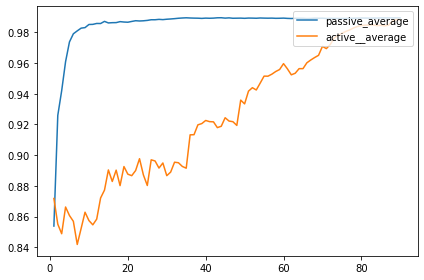

In [213]:
plt.rcParams["figure.autolayout"] = True
plt.plot(range(1,91), passive_average, label = "passive_average")
plt.plot(range(1,91), active_average, label = "active__average")
leg = plt.legend(loc='upper right')